In [1]:
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Legend BS
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [3]:
lvl_3 = '../Seq_data/vsearch/gg_tax_summary/biom_table_w_tax_L3.txt'
lvl_3_df = pd.read_csv(lvl_3, sep='\t', skiprows=1, index_col=0)
lvl_3_df.mean(axis=1).sort_values(ascending=False)

#OTU ID
D_0__Bacteria;D_1__Proteobacteria;D_2__Gammaproteobacteria                               1.221564e-01
D_0__Bacteria;D_1__Proteobacteria;D_2__Betaproteobacteria                                9.461500e-02
D_0__Bacteria;D_1__Proteobacteria;D_2__Deltaproteobacteria                               7.334756e-02
D_0__Bacteria;D_1__Proteobacteria;D_2__Alphaproteobacteria                               6.682502e-02
D_0__Bacteria;D_1__Bacteroidetes;D_2__Flavobacteriia                                     5.426490e-02
D_0__Bacteria;D_1__Chloroflexi;D_2__Anaerolineae                                         5.261518e-02
D_0__Bacteria;D_1__Acidobacteria;D_2__Acidobacteria                                      3.749574e-02
D_0__Bacteria;D_1__Nitrospirae;D_2__Nitrospira                                           3.702494e-02
D_0__Bacteria;D_1__Acidobacteria;D_2__Subgroup 2                                         3.383500e-02
D_0__Bacteria;D_1__Actinobacteria;D_2__Actinobacteria                     

In [2]:
lvl_2 = '../Seq_data/vsearch/gg_tax_summary/biom_table_w_tax_L2.txt'
lvl_2_df = pd.read_csv(lvl_2, sep='\t', skiprows=0, index_col=0)
sorted_levels = (lvl_2_df.mean(axis=1).sort_values(ascending=False))
sorted_levels = list(sorted_levels.index[:12])
lvl_2_small = lvl_2_df.loc[sorted_levels]


In [5]:
# Plotting by depth seems reasonable. DO i want to average or try to plot a single value? Lets try average, then plot a sideways barplot thingie.
# last thing for today:

cols = list(lvl_2_small.columns)
col_groups = {}
for i in cols:
    depth = i.split('.')
    if len(depth) > 1 and len(depth[1]) <4:
        if depth[1] in col_groups.keys():
            col_groups[depth[1]].append(i)
        else:
            col_groups[depth[1]] = [i]


In [18]:
# Import map, sort samples by ph, reorder samples in lvl2 by pH, then plot abundances
mapdf = pd.read_csv('../Metadata/ibp_metadata_2.6.18_version.txt', sep='\t', index_col='#SampleID')
indices = mapdf['pH '].sort_values().index.values.tolist()
indices = [x for x in indices if x not in ['NA.Plate3C6', 'NA.Plate1C1', 'NA.Plate1D2', 'NA.Plate1D1', 'NA.Plate1D3', 'NA.Plate1B3', 'NA.Plate1A3']]
lvl2_ordered_by_ph = lvl_2_small[indices]


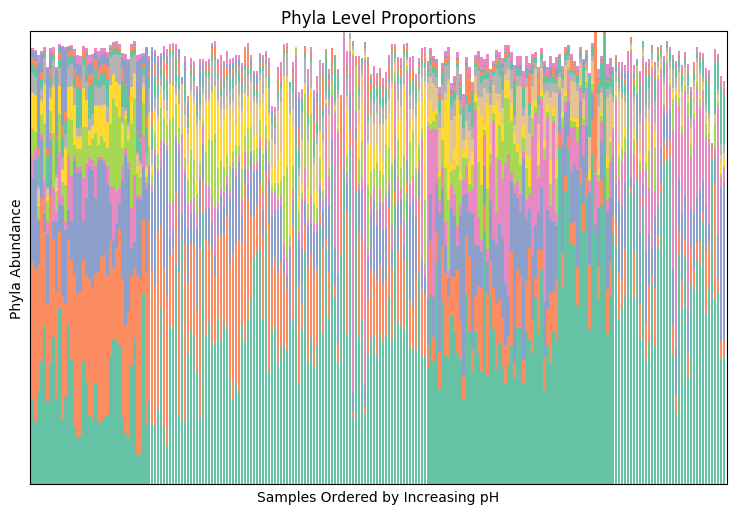

In [36]:
# Plot phyla level abundances by ph:
f,ax= plt.subplots()
colors = sns.color_palette("Set2", 12)

bottoms = np.zeros_like(lvl2_ordered_by_ph.iloc[0,:])
ind = np.arange(233)
j=0
for i,row in lvl2_ordered_by_ph.iterrows():
    ax.bar(ind,row, bottom = bottoms , color = colors[j])
    bottoms += row
    j+=1
ax.set_title('Phyla Level Proportions')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0,233])
ax.set_xlabel('Samples Ordered by Increasing pH')
ax.set_ylabel('Phyla Abundance')
f.savefig('../output/phyla_proportions_by_ph.png')

In [ ]:


for key in range(1,13):
    
    bot = np.zeros()
    
    ax.bar()key*10, width=taxa_frac, height=5,bot=bot, color=colors[ind]
    
    
    ind = 0
    str_key = 'D'+str(key)
    
    depth_values = lvl_2_small [ col_groups [ str_key ]].mean(axis=1)
    for taxa_frac in depth_values:
        ax.bar(key*10, width=taxa_frac, height=5,left=left, color=colors[ind])
        left += taxa_frac
        ind+=1
        
patches = []
pairs = zip(labels, colors)
for pair in pairs:
    #print(pair[1])
    patches.append(mpatches.Patch(color=pair[1], label=pair[0]))
legend = ax.legend(handles=patches, bbox_to_anchor=(1,1))
        
ax.set_ylabel('Depth in cm')
ax.set_xlabel('Abundance')
ax.set_title('Average Phylum Level Abundance by Depth')
ax.invert_yaxis()

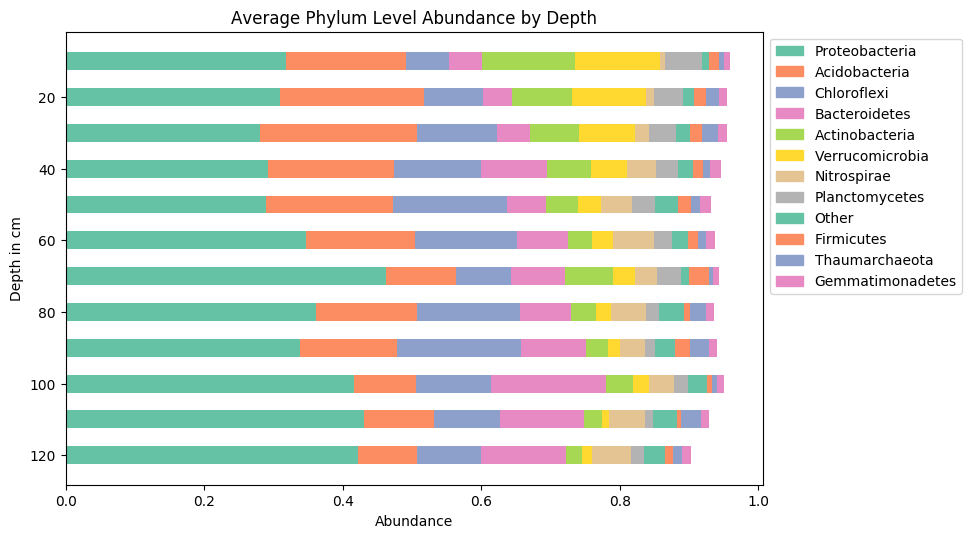

In [8]:


# Set up plot
f,ax = plt.subplots()
colors = sns.color_palette("Set2", 12)



# Iterate thru each depth
for key in range(1,13):
    left = 0
    ind = 0
    str_key = 'D'+str(key)
    
    depth_values = lvl_2_small [ col_groups [ str_key ]].mean(axis=1)
    for taxa_frac in depth_values:
        ax.barh(key*10, width=taxa_frac, height=5,left=left, color=colors[ind])
        left += taxa_frac
        ind+=1
        
patches = []
pairs = zip(labels, colors)
for pair in pairs:
    #print(pair[1])
    patches.append(mpatches.Patch(color=pair[1], label=pair[0]))
legend = ax.legend(handles=patches, bbox_to_anchor=(1,1))
        
ax.set_ylabel('Depth in cm')
ax.set_xlabel('Abundance')
ax.set_title('Average Phylum Level Abundance by Depth')
ax.invert_yaxis()
#f.savefig('../output/phylums_by_depth.png', bbox_extra_artists=(legend,), bbox_inches='tight')

In [7]:
labels = list(depth_values.index)
labels = [x.split(';')[1] for x in labels]
labels = [x.split('__')[-1] for x in labels]
labels

['Proteobacteria',
 'Acidobacteria',
 'Chloroflexi',
 'Bacteroidetes',
 'Actinobacteria',
 'Verrucomicrobia',
 'Nitrospirae',
 'Planctomycetes',
 'Other',
 'Firmicutes',
 'Thaumarchaeota',
 'Gemmatimonadetes']

In [100]:
pairs = zip(labels, colors)
for i in pairs:
    print(i)

('Proteobacteria', (0.40000000000000002, 0.76078431372549016, 0.6470588235294118))
('Acidobacteria', (0.9882352941176471, 0.55294117647058827, 0.3843137254901961))
('Chloroflexi', (0.55294117647058827, 0.62745098039215685, 0.79607843137254897))
('Bacteroidetes', (0.90588235294117647, 0.54117647058823526, 0.76470588235294112))
('Actinobacteria', (0.65098039215686276, 0.84705882352941175, 0.32941176470588235))
('Verrucomicrobia', (1.0, 0.85098039215686272, 0.18431372549019609))
('Nitrospirae', (0.89803921568627454, 0.7686274509803922, 0.58039215686274515))
('Planctomycetes', (0.70196078431372544, 0.70196078431372544, 0.70196078431372544))
('Other', (0.40000000000000002, 0.76078431372549016, 0.6470588235294118))
('Firmicutes', (0.9882352941176471, 0.55294117647058827, 0.3843137254901961))
('Thaumarchaeota', (0.55294117647058827, 0.62745098039215685, 0.79607843137254897))
('Gemmatimonadetes', (0.90588235294117647, 0.54117647058823526, 0.76470588235294112))


In [9]:
depth_values

#OTU ID
D_0__Bacteria;D_1__Proteobacteria      0.422675
D_0__Bacteria;D_1__Acidobacteria       0.084990
D_0__Bacteria;D_1__Chloroflexi         0.091457
D_0__Bacteria;D_1__Bacteroidetes       0.123716
D_0__Bacteria;D_1__Actinobacteria      0.023134
D_0__Bacteria;D_1__Verrucomicrobia     0.014066
D_0__Bacteria;D_1__Nitrospirae         0.056000
D_0__Bacteria;D_1__Planctomycetes      0.019173
Unassigned;Other                       0.030629
D_0__Bacteria;D_1__Firmicutes          0.011435
D_0__Archaea;D_1__Thaumarchaeota       0.012101
D_0__Bacteria;D_1__Gemmatimonadetes    0.013176
dtype: float64

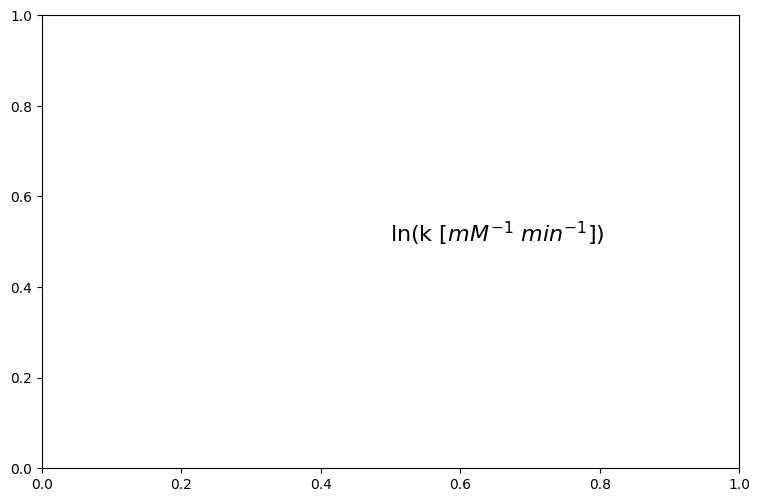

In [20]:
f,ax = plt.subplots()
ax.text(.5,.5, s=r"ln(k [$mM^{-1}$ $min^{-1}$])", fontsize=16)
f.savefig('/Users/jimbo/Desktop/sf7_labels.png', dpi=300)